In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import os
import glob
import json 
import requests
from bs4 import BeautifulSoup
%matplotlib inline

In [2]:
# os.listdir('./Prediction_train&test_Data')
def load_data(url):
    
    folderName = "./Prediction_train&test_Data/"
    fileName = "Store_league_data.json"
    path = os.path.join(folderName, fileName)

#     if os.path.exists(path):
#         files = glob.glob("./Prediction_train&test_Data/*")
#         for f in files:
#             os.remove(f)

    response = requests.get(url)
    # print(path)

    with open(path, 'wb') as outfile:
        outfile.write(response.content)
     

        
url = "https://vsmobile.bet9ja.com/shopadmin/standings_view/league_data.php?pid=14001"
load_data(url)

In [3]:
folderName = "./Prediction_train&test_Data/"
fileName = "Store_league_data.json"


path = os.path.join(folderName, fileName)


with open(path, "r") as outfile:
    json_obj = json.load(outfile)

In [4]:
# print(json_obj)

In [5]:
# json_obj["matches"]["1"].keys() # 1539761

In [6]:
# json_obj["matches"]["1"]["1540521"]["wonmarkets"].split(",")

In [7]:
# home_away_game = json_obj["matches"]["1"]["1537861"]["wonmarkets"].split(",")[2].split("_")
# games_scores = json_obj["matches"]["1"]["1537861"]["wonmarkets"].split(",")[4].split("_")
# total_goales = json_obj["matches"]["1"]["1537861"]["wonmarkets"].split(",")[5].split("_")

# print( f"games: {home_away_game}, games score: {games_scores}, scores_total: {total_goales}" )

In [8]:
# len(json_obj["matches"].keys()), len(json_obj["matches"]["1"].keys())
json_obj["matches"]["1"].keys()

dict_keys(['1569021', '1569022', '1569023', '1569024', '1569025', '1569026', '1569027', '1569028', '1569029', '1569030'])

In [9]:
teams = {"id": [], "name": [], "club": []}

In [10]:
for x, y in json_obj["teams"].items():
    # main_info.id.append(x)
    teams["id"].append(x)
    teams["name"].append(y["fifa"])
    teams["club"].append(y["team"])
   
    
    # print(x)
    # print(y)

In [11]:
# teams # if you have ound its index you havefound the club

In [12]:
# len(teams['id']) # total number of teams 

In [13]:
# len(json_obj["weeks"])

In [14]:
# print(json_obj["weeks"]["1"]["event_data"]), print(len(json_obj["weeks"]["1"]["event_data"]))

In [15]:
# print(json_obj["weeks"]["1"]["teamstats"].split("-"))

In [16]:
def indetify_club(teams_id):
    idx = teams["id"].index(teams_id)
    return teams["name"][idx]

def get_club_id(team_name):
    club_id = teams["name"].index(team_name)
    return teams["id"][club_id]

In [17]:
# indetify_club("50")

In [18]:
# json_obj["weeks"]["1"]

In [19]:
def query_score(teamA, teamB):
    if teamA > teamB:
        return "win-loss"
    elif teamA < teamB:
        return "loss-win"
    else:
        return "draw-draw"

In [20]:
# json_obj["matches"]['1']['1537862']# .keys()

In [21]:
def get_new_data(data, score, week, history):
    start = 0
    stop = 1
    add_num = 2
    data = data.split("-")
    score = score.split("-")
    
    # store clubs id and name.
    result = {
        "weeks": [],
        "id":[],
        "club": [],
        "score_string": [],
        "score_num": [],
        "game_type": [],
        "team_stats": [],
        "team_history": []
    }
    
    # GET ALL WEEK GAME ID
    games_id = list(json_obj["matches"][week].keys())
    
    for i in range(10):
        
        # GET GAME RESULTES
        game_resulte = json_obj["matches"][week][games_id[i]]["wonmarkets"]
        
        # slice the event_data from data pass thoure the function parameter
        teamA = data[start]
        teamB = data[stop]

        # identfy the club from thire respected ID
        clubA = indetify_club(teamA)
        clubB = indetify_club(teamB)
		
        # slice the teamstats from score pass thoure the function parameter
        teamA_score = game_resulte.split(",")[4].split("_")[1] # score[start]
        teamB_score = game_resulte.split(",")[4].split("_")[2] # score[stop] 
        
        # team stats
        teamstatsA = score[start]
        teamstatsB = score[stop]
        
        # team history
        team_histA = sum([ int(j) for j in history.split("-")[start].replace("x", "")])
        team_histB = sum([ int(j) for j in history.split("-")[stop].replace("x", "")])
        
        result["weeks"].append( int(week) )
        result["weeks"].append( int(week) )
        
		# appending the data twice to add information
        
        ####### HOME APPENDING #######
        result["id"].append( int(teamA) )
        
        result["club"].append(f"{clubA}")
        # query scores
        win_loss_drawA = query_score( int(teamA_score), int(teamB_score) ).split("-")[0]
        
        result["score_string"].append( win_loss_drawA )
        # query wins scores
        result["score_num"].append( f" {int(teamA_score)} " )
        
        result["game_type"].append( "home" )
        
        result["team_stats"].append( int(teamstatsA) )
        
        result["team_history"].append(team_histA)
        
        
        ####### AWAY APPENDING #######
        result["id"].append( int(teamB) )
        
        result["club"].append(f"{clubB}")
        
        win_loss_drawB = query_score( int(teamA_score), int(teamB_score) ).split("-")[1]
        
        result["score_string"].append( win_loss_drawB )
        
        result["score_num"].append( f" {int(teamB_score)} " )
        
        result["game_type"].append( "away" )
        
        result["team_stats"].append( int(teamstatsB) )
        
        result["team_history"].append(team_histB)
        
        
        # accumilate the START and STOP for the next sclice
        start += add_num
        stop += add_num

        
        
    return result
 

In [22]:
# get_new_data( json_obj["weeks"]["1"]["event_data"], json_obj["weeks"]["1"]["teamstats"],  json_obj["weeks"]["1"]["matchday"])

# games_id = list(json_obj["matches"][week].keys())
# game_resulte = json_obj["matches"]["1"][games_id[1]]
# game_resulte

In [23]:
json_obj["weeks"]["4"]["event_data"]

'46-52-53-525-55-827-63-49-45-58-51-71-67-512-972-50-48-47-60-1053'

In [24]:
main_second_info = []
for week, events in json_obj["weeks"].items():
    main_second_info.append(get_new_data( events["event_data"], events["teamstats"], events["matchday"], events["teamhistory"]) )
    
    # print(events["matchday"])

In [25]:
# json_obj["weeks"]

In [26]:
# main_second_info[0]

# create database

In [27]:
df_list = []
for data in main_second_info:
    new_data = pd.DataFrame(data)
    df_list.append(new_data)

In [28]:
df = pd.concat(df_list)

In [29]:
df.sample(20)

,weeks,id,club,score_string,score_num,game_type,team_stats,team_history
7,6,1053,FOR,loss,0,away,2,1
12,18,67,BOU,loss,1,home,18,3
12,23,827,LEE,win,5,home,29,10
19,2,525,WOL,win,3,away,4,4
14,33,60,ASV,win,2,home,44,7
15,7,71,BRI,win,2,away,10,7
4,18,50,MNU,draw,2,home,24,6
10,11,49,EVE,loss,2,home,14,3
1,21,48,ARS,loss,0,away,27,5
5,11,512,FUL,loss,1,away,15,2


### Wrangling Data

In [30]:
df["binary_game_type"] = df["game_type"].apply(lambda x: 0 if x == "home" else 1)

In [31]:
df.head()

,weeks,id,club,score_string,score_num,game_type,team_stats,team_history,binary_game_type
0,1,51,TOT,win,1,home,3,3,0
1,1,972,BRN,loss,0,away,0,0,1
2,1,512,FUL,win,3,home,3,3,0
3,1,48,ARS,loss,2,away,0,0,1
4,1,50,MNU,loss,1,home,0,0,0


In [32]:
# df["weeks"].apply(lambda x: int(x))

### ANALYING DATA

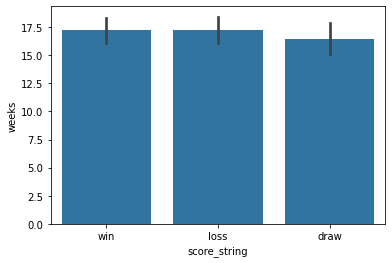

In [130]:
color_paletter = sb.color_palette()[0]
sb.barplot(x = df["score_string"], y = df["weeks"].apply(lambda x: int(x)) , color=color_paletter);

In [34]:
# df.groupby("club").mean()
# df.head()

In [35]:
# sb.barplot(x = df["club"], y = df["score_string"] , color=color_paletter)
all_tems = df[["club", "score_string"]].value_counts()
# df.query("club == 'MNU'")
club = all_tems.index
club_values = all_tems.values
# plt.figure(figsize=[10, 6])
main_club = [x[0] for x in club]
main_scores = [x[1] for x in club]
print(f"main_club: {main_club[0]}, --- main_scores: {main_scores[0]}, ---, club_values: {club_values[0]}")

main_club: MNC, --- main_scores: win, ---, club_values: 22


In [36]:
query_df_club = pd.DataFrame({
    "clubs": main_club,
    "scores": main_scores,
    "occ": club_values
})

In [37]:
# query_df_club

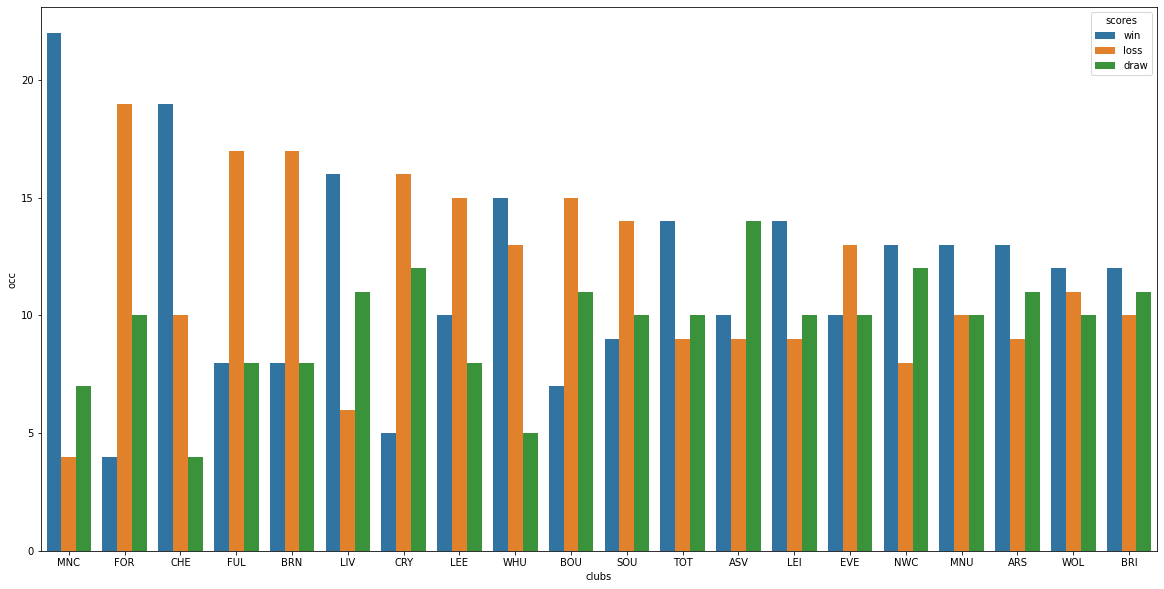

In [132]:
plt.figure(figsize=[20, 10])
sb.barplot(data=query_df_club, x="clubs", y="occ", hue="scores");

In [39]:
query_df_club_wins = query_df_club.query("scores == 'win'")
query_df_club_loss = query_df_club.query("scores == 'loss'")
query_df_club_draw = query_df_club.query("scores == 'draw'")
# query_df_club_draw.head()

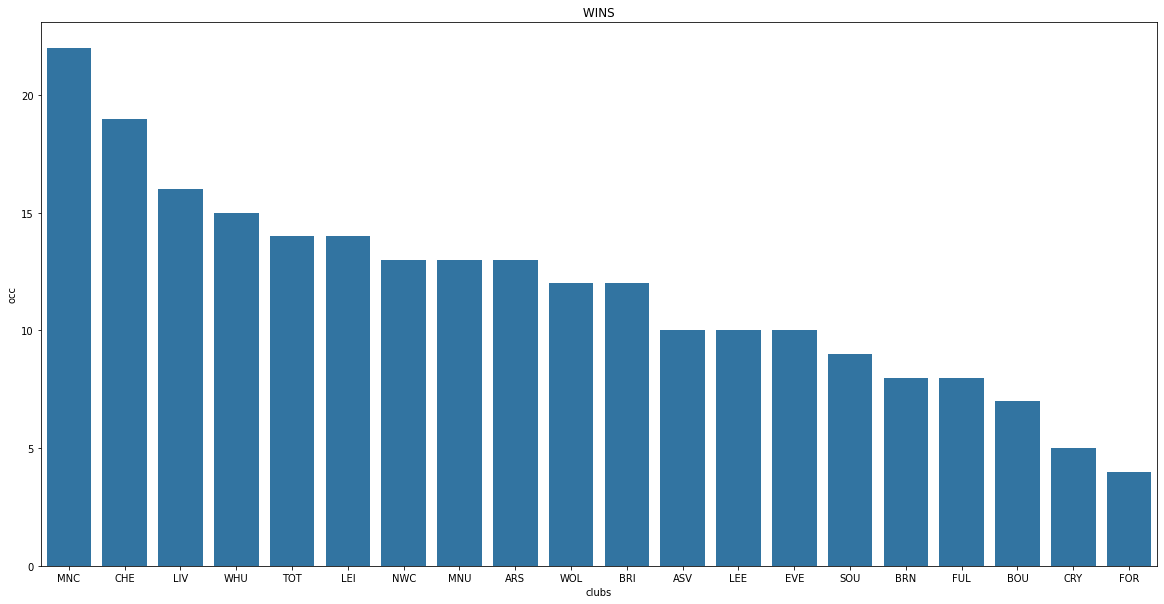

In [133]:
plt.figure(figsize=[20, 10])
plt.title(" WINS ")
sb.barplot(data=query_df_club_wins, x="clubs", y="occ", color=color_paletter);

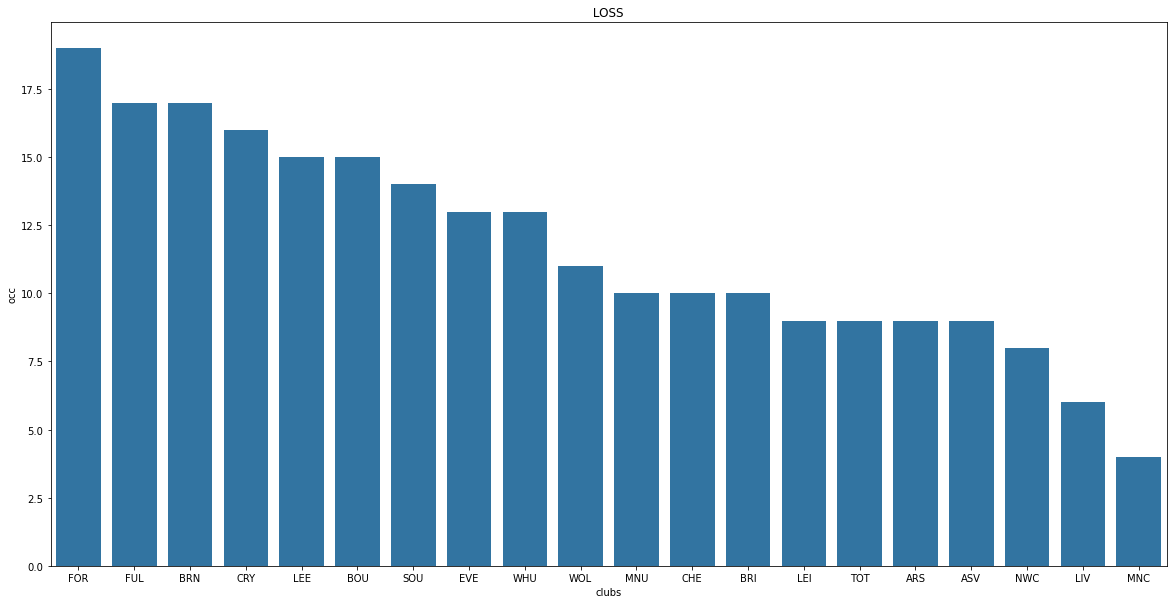

In [134]:
plt.figure(figsize=[20, 10])
plt.title(" LOSS ")
sb.barplot(data=query_df_club_loss, x="clubs", y="occ", color=color_paletter);

In [42]:
# df.head()

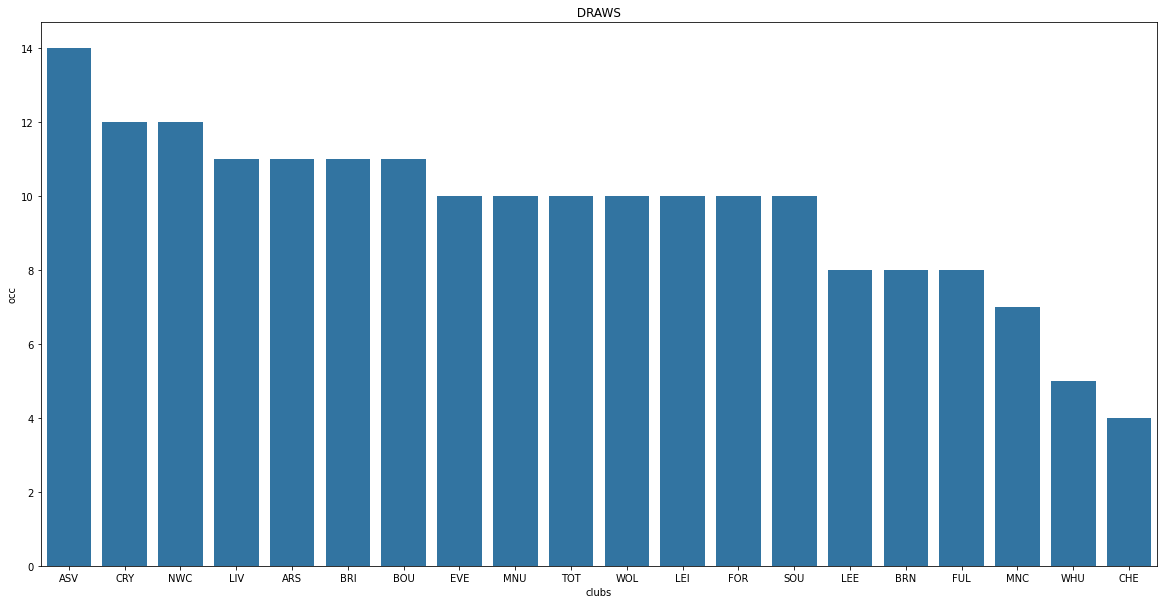

In [135]:
plt.figure(figsize=[20, 10])
plt.title(" DRAWS ")
sb.barplot(data=query_df_club_draw, x="clubs", y="occ", color=color_paletter);

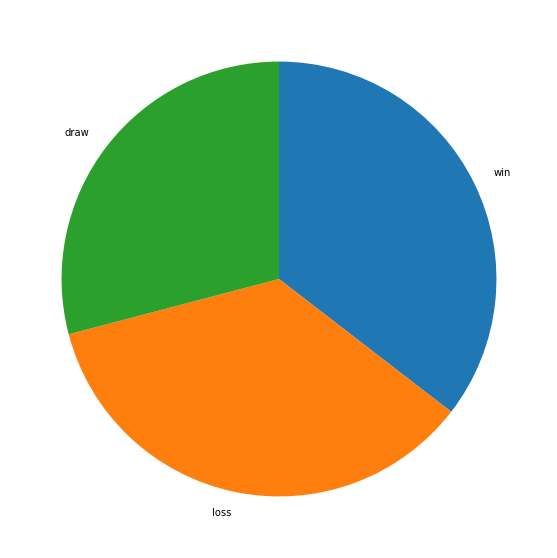

In [136]:
sort_count = df.score_string.value_counts()

plt.figure(figsize=[20, 10])

plt.pie([np.float64(x) for x in sort_count.values], labels=sort_count.index, startangle=90, counterclock=False);


### Select training data

In [45]:
df.head()

,weeks,id,club,score_string,score_num,game_type,team_stats,team_history,binary_game_type
0,1,51,TOT,win,1,home,3,3,0
1,1,972,BRN,loss,0,away,0,0,1
2,1,512,FUL,win,3,home,3,3,0
3,1,48,ARS,loss,2,away,0,0,1
4,1,50,MNU,loss,1,home,0,0,0


In [46]:
train_df = df[["weeks", "id", "score_string", "binary_game_type", "team_stats", "team_history"]]
# train_df = df[["club", "final"]]

In [47]:
train_home = df.query("game_type == 'home'")
train_away = df.query("game_type == 'away'")
get_columns_names = list(df.columns)[1:]

for x in get_columns_names:
    train_home.rename(columns={x: f'{x}_home'}, inplace=True)
    train_away.rename(columns={x: f'{x}_away'}, inplace=True)    

C:\Users\fekom\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [48]:
train_home = train_home.reset_index().drop('index', axis = 1) 
train_away = train_away.reset_index().drop('index', axis = 1) 

In [49]:
train_main = pd.concat([train_home, train_away], axis=1).drop('weeks', axis = 1)
train_main["weeks"] = train_away["weeks"]

In [50]:
order_columns = ["weeks", "club_home", "club_away", "id_home", "id_away", "game_type_home", "game_type_away", 
                  "binary_game_type_home", "binary_game_type_away", "score_string_home", "score_string_away", 
                  "score_num_home", "score_num_away", "team_stats_home", "team_stats_away", 
                  "team_history_home", "team_history_away"]
train_main = train_main.reindex(order_columns, axis=1)

In [51]:
join_score_string_WDL = []

for i in range(len(train_main["score_string_home"])): #+train_main["binary_game_type_away"].values
    home_score = train_main["score_string_home"].values[i]
    away_score = train_main["score_string_away"].values[i]
    
    join_score_string_WDL.append(f"{home_score}-{away_score}")

In [52]:
train_main["score_string_WDL"] = join_score_string_WDL

In [53]:
train_main.head()

,weeks,club_home,club_away,id_home,id_away,game_type_home,game_type_away,binary_game_type_home,binary_game_type_away,score_string_home,score_string_away,score_num_home,score_num_away,team_stats_home,team_stats_away,team_history_home,team_history_away,score_string_WDL
0,1,TOT,BRN,51,972,home,away,0,1,win,loss,1,0,3,0,3,0,win-loss
1,1,FUL,ARS,512,48,home,away,0,1,win,loss,3,2,3,0,3,0,win-loss
2,1,MNU,LIV,50,45,home,away,0,1,loss,win,1,2,0,3,0,3,loss-win
3,1,CHE,ASV,47,60,home,away,0,1,loss,win,0,2,0,3,0,3,loss-win
4,1,BRI,MNC,71,46,home,away,0,1,loss,win,1,2,0,3,0,3,loss-win


#### STANDARDIZATION OF TRAIN DATA FRAME

In [54]:
# train_df[["weeks_normalization"]]
standardized_col = ["standardized_weeks", "standardized_id_home", "standardized_id_away",
                    "standardized_team_stats_home", "standardized_team_stats_away", 
                    "standardized_team_history_home", "standardized_team_history_away"]
col = ["weeks", "id_home", "id_away", "team_stats_home", "team_stats_away", "team_history_home", "team_history_away"]
for x in range(len(standardized_col)):
    ################ WEEK STANDADIZATION BY VARIANCE ################
    # train_df[standardized_col[x]] = (train_df[col[x]] - train_df[col[x]].mean())/train_df[col[x]].std()**2
    ################ WEEK STANDADIZATION BY STANDARD DIVIATION ################
    train_main[standardized_col[x]] = (train_main[col[x]] - train_main[col[x]].mean())/train_main[col[x]].std()
    
# (train_df["weeks"] - train_df["weeks"].mean())/train_df["weeks"].std()

In [55]:
train_main.sample(5)

,weeks,club_home,club_away,id_home,id_away,game_type_home,game_type_away,binary_game_type_home,binary_game_type_away,score_string_home,...,team_history_home,team_history_away,score_string_WDL,standardized_weeks,standardized_id_home,standardized_id_away,standardized_team_stats_home,standardized_team_stats_away,standardized_team_history_home,standardized_team_history_away
133,14,FUL,WOL,512,525,home,away,0,1,win,...,3,7,win-loss,-0.314585,0.824217,0.876311,-0.337727,-0.579517,-1.025337,0.245863
185,19,ASV,SOU,60,52,home,away,0,1,win,...,8,7,win-loss,0.209724,-0.528037,-0.547582,0.255442,-0.182340,0.426857,0.245863
42,5,EVE,LIV,49,45,home,away,0,1,loss,...,10,12,loss-win,-1.258341,-0.560946,-0.568654,-0.864987,-0.711909,1.007735,1.742816
270,28,ARS,LEE,48,827,home,away,0,1,win,...,10,4,win-loss,1.153479,-0.563938,1.785436,1.112241,0.678209,1.007735,-0.652309
304,31,FOR,BRI,1053,71,home,away,0,1,draw,...,1,9,draw-draw,1.468065,2.442733,-0.490385,-0.271819,1.538759,-1.606215,0.844644


In [56]:
train_main = train_main.reset_index()
train_main = train_main.drop('index', axis = 1) 
# train_df.head()

In [57]:
train_main.columns

Index(['weeks', 'club_home', 'club_away', 'id_home', 'id_away',
       'game_type_home', 'game_type_away', 'binary_game_type_home',
       'binary_game_type_away', 'score_string_home', 'score_string_away',
       'score_num_home', 'score_num_away', 'team_stats_home',
       'team_stats_away', 'team_history_home', 'team_history_away',
       'score_string_WDL', 'standardized_weeks', 'standardized_id_home',
       'standardized_id_away', 'standardized_team_stats_home',
       'standardized_team_stats_away', 'standardized_team_history_home',
       'standardized_team_history_away'],
      dtype='object')

#### Train the model

In [58]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#### SPLIT DATA FOR EVEN FEATURES

In [59]:
# train_df[["home", "away"]][:20]["home"].value_counts()
# prec_20 = int((20/100)*len(train_df))
# prec_20

In [60]:
# train_df[["home", "away"]][:20]["away"].value_counts()

In [61]:
# train_data = train_df[prec_20:]
# test_data = train_df[:prec_20]

In [62]:
# train_data.head()

### Ordinary Split

In [63]:
# x_train_data = train_data[["id"]]
# x_train_data_dummy = pd.get_dummies(x_train_data)
# y_train_data = train_data["score_string"]

In [64]:
# x_test_data = test_data[["id"]]
# x_test_data_dummy = pd.get_dummies(x_test_data)
# y_test_data = test_data["score_string"]

### cross validation spilt

In [65]:
# x_train, x_test, y_train, y_test = train_test_split(train_df[["id"]], train_df["score_string"], test_size=0.3)
# x_train, x_test, y_train, y_test = train_test_split(train_df["club"], train_df["final"], test_size=0.3)

### Stratified Shuffle Split

In [66]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in split.split(train_main[standardized_col], train_main["score_string_WDL"]):
    strat_train_set = train_main.loc[train_index]
    strat_test_set = train_main.loc[test_index]    

In [67]:
# y_train.head()

In [68]:
# x_train.head()

In [69]:
# trat_train_set.head()

In [70]:
# strat_test_set.head()

### StratifiedShuffleSplit train

In [71]:
y_strat_train_set = strat_train_set["score_string_WDL"]
x_strat_train_set = strat_train_set[standardized_col]
# x_strat_train_set = strat_train_set["club"]

In [72]:
# len(y_strat_train_set), len(x_strat_train_set)

### StratifiedShuffleSplit test

In [73]:
y_strat_test_set = strat_test_set["score_string_WDL"]
x_strat_test_set = strat_test_set[standardized_col]
# x_strat_test_set = strat_test_set["club"]

In [74]:
# len(y_strat_train_set), len(x_strat_train_set)

In [75]:
# x_strat_train_set, x_strat_test_set, y_strat_train_set, y_strat_test_set

### Selecting and Training model

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsOneClassifier

##### Decision tree classifer

In [77]:
def multilabel_accuracy_score(y_label, prediction):
    accuracy = (y_label.iloc[:, :].values == predictions).mean()
    return accuracy

In [78]:
dct_model = DecisionTreeClassifier()
dct_model.fit(x_strat_train_set, y_strat_train_set)
# x_strat_train_set, x_strat_test_set, y_strat_train_set, y_strat_test_set

DecisionTreeClassifier()

In [79]:
predictions = dct_model.predict(x_strat_test_set)

In [80]:
# len(predictions) #, len(y_strat_test_set), len(x_strat_test_dummy)
# y_strat_test_set
# (y_strat_test_set.iloc[:, :].values == predictions).mean()

In [81]:
# y_strat_test_set.iloc[:, :].values.reshape(-1, 1).shape

In [82]:
accuracy = accuracy_score(y_strat_test_set, predictions)

In [83]:
print(f"accuracy: {accuracy}")

accuracy: 0.45454545454545453


##### SGDClassifier

In [84]:
sgd_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
sgd_clf.fit(x_strat_train_set, y_strat_train_set)
# x_strat_train_set, x_strat_test_set, y_strat_train_set, y_strat_test_set

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [85]:
sgd_predict = sgd_clf.predict(x_strat_test_set)
sgd_accuracy = accuracy_score(y_strat_test_set, sgd_predict)

In [86]:
print(f"accuracy: {sgd_accuracy}")

accuracy: 0.5757575757575758


##### RandomForestClassifier & cross_validation

In [87]:
forest_clf = RandomForestClassifier(random_state=42)

In [88]:
main_data = cross_val_score(sgd_clf, x_strat_train_set, y_strat_train_set, cv=7, scoring="accuracy")
print(main_data)
# x_strat_train_set, x_strat_test_set, y_strat_train_set, y_strat_test_set

[0.55263158 0.65789474 0.55263158 0.57894737 0.47368421 0.64864865
 0.62162162]


In [89]:
main_data_forst_clf = cross_val_score(forest_clf, x_strat_train_set, y_strat_train_set, cv=7, scoring="accuracy")
# x_train_data_dummy, y_train_data, x_test_data_dummy, y_test_data
main_data_forst_clf

array([0.52631579, 0.52631579, 0.55263158, 0.47368421, 0.44736842,
       0.54054054, 0.67567568])

In [90]:
main_data.mean(), main_data_forst_clf.mean()

(0.583722820564926, 0.5346474293842715)

#### Gride Search Cross Validation

In [91]:
from sklearn.model_selection import GridSearchCV

#### Random Forest Gride Search Cross Validation 

In [92]:
param_grid = [
    {"n_estimators": [3, 10, 30], 
     # "max_features": [0, 0, 0]
    },
    {"bootstrap": [True], "n_estimators": [3, 10], 
     # "max_features": [2, 3, 4]
    }
]
grid_search = GridSearchCV(forest_clf, param_grid, cv=7, scoring="accuracy")

In [93]:
grid_search.fit(x_strat_train_set, y_strat_train_set)
# x_strat_train_set, x_strat_test_set, y_strat_train_set, y_strat_test_set

GridSearchCV(cv=7, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'n_estimators': [3, 10, 30]},
                         {'bootstrap': [True], 'n_estimators': [3, 10]}],
             scoring='accuracy')

In [94]:
grid_search.best_params_

{'n_estimators': 30}

In [95]:
final_model = grid_search.best_estimator_
final_model

RandomForestClassifier(n_estimators=30, random_state=42)

In [96]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_score), params)

0.7255462733957411 {'n_estimators': 3}
0.7206282115661441 {'n_estimators': 10}
0.7464608632485129 {'n_estimators': 30}
0.7255462733957411 {'bootstrap': True, 'n_estimators': 3}
0.7206282115661441 {'bootstrap': True, 'n_estimators': 10}


#### Support Vectore Maching Gride Search Cross Validation 

In [97]:
svm_clf = SVC()
svm_parames = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
svm_gridCV = GridSearchCV(SVC(), svm_parames, refit = True, cv=7, scoring="accuracy")

svm_gridCV.fit(x_strat_train_set, y_strat_train_set)

GridSearchCV(cv=7, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [98]:
svm_gridCV.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [99]:
final_model_svc = svm_gridCV.best_estimator_
final_model_svc

SVC(C=1000, gamma=0.0001)

In [100]:
svm_cvres = svm_gridCV.cv_results_
for mean_score, params in zip(svm_cvres["mean_test_score"], svm_cvres["params"]):
    print(np.sqrt(mean_score), params)

0.6571322547583955 {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.7124035352189665 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.6571322547583955 {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.6571322547583955 {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.6571322547583955 {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.7151792825706351 {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.7639510555003917 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.7662087167359254 {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.6571322547583955 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.6571322547583955 {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.6960275707119807 {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.7286903569094312 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.7834526204786417 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.7760251264951664 {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.6571322547583955 {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.6933949711814644 {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.6934682338972039 {'C': 100,

### FINAL PREDICTION!!!🎉👏🏽🎊

In [101]:
# x_train_data_dummy, y_train_data, x_test_data_dummy, y_test_data
# x_strat_train_set, x_strat_test_set, y_strat_train_set, y_strat_test_set

final_predctions = final_model.predict(x_strat_test_set)
final_accuracy_score = accuracy_score(y_strat_test_set, final_predctions)
print(f"accuracy: {final_accuracy_score}")

accuracy: 0.5606060606060606


In [102]:
svc_final_predctions = final_model_svc.predict(x_strat_test_set)
svc_final_accuracy_score = accuracy_score(y_strat_test_set, svc_final_predctions)
print(f"accuracy: {svc_final_accuracy_score}")

accuracy: 0.5151515151515151


#### Main predicions!! 

In [103]:
id_cubs = np.array([get_club_id(x) for x in df.club.value_counts().index]).reshape(-1, 1)
cubs = df.club.value_counts().index

##### SELECTING MAIN TEAMS FOR PREDICTIONS

In [104]:
df.club.value_counts().index

Index(['BRN', 'EVE', 'ARS', 'CRY', 'LIV', 'WHU', 'LEE', 'MNU', 'BRI', 'TOT',
       'BOU', 'CHE', 'ASV', 'MNC', 'NWC', 'SOU', 'FUL', 'LEI', 'WOL', 'FOR'],
      dtype='object')

In [127]:
def predition_func(home, away):
    
    main_clubs_home = home
    main_clubs_away = away
    
    teams_id_home = [get_club_id(x) for x in main_clubs_home]
    teams_id_away = [get_club_id(x) for x in main_clubs_away]

    # game_type_home = ["home", "home"]
    # game_type_away = ["away", "away"]


    weaks = np.array([(len(df)/20)+1 for _ in range(2)])
    ################ WEEK STANDADIZATION BY VARIANCE ################
    # standardized_weeks = (weaks-train_df["weeks"].mean())/train_df["weeks"].std()**2
    ################ WEEK STANDADIZATION BY STANDARD DIVIATION ################
    standardized_weeks = (weaks-train_df["weeks"].mean())/train_df["weeks"].std()
    
    # main_clubs = ["BRI", "LEE", "WOL", "BRN"]

    ############## NOTE ##############
    ############## !!!!!!!!!! IF THIS CELL PRODUCESS AN ERROR THEN THE TEAM FESTURES DOES NOTE EXSISTE !!!!!!!!!! ##############

    #### Standardized week, standardized clube ids, and standardized team stats
    predict_teams_stats_home = []
    predict_teams_stats_away = [] 

    predict_standardized_team_stats_home = []
    predict_standardized_team_stats_away = []

    predict_standardized_club_id_home = []
    predict_standardized_club_id_away = []

    predict_team_history_home = []
    predict_team_history_away = []

    predict_standardized_team_history_home = []
    predict_standardized_team_history_away = []


    for i in range(len(main_clubs_home)):

        target_prediction_club_home_df = train_main.query(f"id_home == {get_club_id(main_clubs_home[i])}").sort_values("weeks", ascending=False)
        target_prediction_club_away_df = train_main.query(f"id_away == {get_club_id(main_clubs_away[i])}").sort_values("weeks", ascending=False)

        ############## STATANDASTATIONS

        predict_standardized_team_stats_home.append(target_prediction_club_home_df.standardized_team_stats_home.values[0])
        predict_standardized_team_stats_away.append(target_prediction_club_away_df.standardized_team_stats_away.values[0])
        predict_standardized_club_id_home.append(target_prediction_club_home_df.standardized_id_home.values[0])
        predict_standardized_club_id_away.append(target_prediction_club_away_df.standardized_id_away.values[0])
        predict_standardized_team_history_home.append(target_prediction_club_home_df.standardized_team_history_home.values[0])
        predict_standardized_team_history_away.append(target_prediction_club_away_df.standardized_team_history_away.values[0])

        ############## NONE STATANDASTATIONS
        predict_teams_stats_home.append(target_prediction_club_home_df.team_stats_home.values[0])
        predict_teams_stats_away.append(target_prediction_club_away_df.team_stats_away.values[0])
        predict_team_history_home.append(target_prediction_club_home_df.team_history_home.values[0])
        predict_team_history_away.append(target_prediction_club_away_df.team_history_away.values[0])
        
        
    ############## SETTING PREDICTION DATA FRAME 
    ##### Combine Data For DataFrame    
    main_prediction_data = pd.DataFrame({
        "weeks": weaks,
        "standardized_weeks": standardized_weeks,
        "home": main_clubs_home,
        "away": main_clubs_away,
        "id_home": teams_id_home,
        "id_away": teams_id_away, 
        "standardized_id_home":  predict_standardized_club_id_home,
        "standardized_id_away": predict_standardized_club_id_away,
        "team_stats_home": predict_teams_stats_home,
        "team_stats_away": predict_teams_stats_away,
        "standardized_team_stats_home": predict_standardized_team_stats_home,
        "standardized_team_stats_away": predict_standardized_team_stats_away,
        "team_history_home": predict_team_history_home,
        "team_history_away": predict_team_history_away,
        "standardized_team_history_home": predict_standardized_team_history_home,
        "standardized_team_history_away": predict_standardized_team_history_home,

    })


    prediction_data = main_prediction_data[standardized_col]
    # prediction_data
    
    ############## PREDICTION ON THE PREDICTION DATA FRAME    
    
    rfc_predictions = final_model.predict(prediction_data)
    svm_predictions = final_model_svc.predict(prediction_data)
    
    ############## RESULTE FOR PREDICTION ON THE PREDICTION DATA FRAME    
    prediction_df = pd.DataFrame({
        "week": weaks,
        "home": main_clubs_home,
        "away": main_clubs_away,
        "id_home": teams_id_home,
        "id_away": teams_id_away,
        "rf_predictions": rfc_predictions,
        "svm_predictios": svm_predictions,
    })
    prediction_df["rf_accuracy"] = final_accuracy_score
    prediction_df["svm_accuracy"] = svc_final_accuracy_score
    # prediction_df["mean_accuracy"] = (final_accuracy_score+svc_final_accuracy_score)/2
    
    ############## RETURN RESULTE FOR PREDICTION ON THE PREDICTION DATA FRAME    
    
    return prediction_df
    # .sort_values(by=["clubs"])

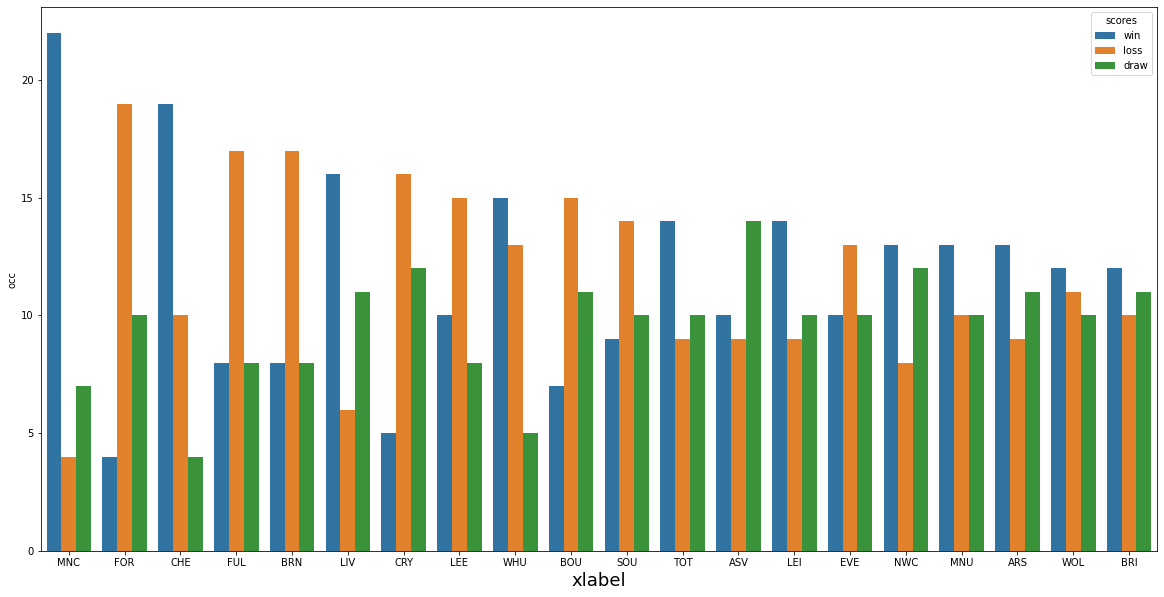

In [138]:
plt.figure(figsize=[20, 10])
sb.barplot(data=query_df_club, x="clubs", y="occ", hue="scores")
# plt.xlabel(fontsize=25)
plt.xlabel('xlabel', fontsize=18);

In [128]:
pred_home = ["BRI", "LEE"]
pred_away = ['SOU', 'NWC']
predition_func(pred_home, pred_away)

,week,home,away,id_home,id_away,rf_predictions,svm_predictios,rf_accuracy,svm_accuracy
0,34.0,BRI,SOU,71,52,win-loss,win-loss,0.560606,0.515152
1,34.0,LEE,NWC,827,53,win-loss,draw-draw,0.560606,0.515152


In [ ]:
print(f"week of game {len(df)/20}")

In [124]:
# train_main.head()

In [125]:
# x_strat_train_set.head(3)

In [108]:
# train_df.query(f"id == {get_club_id('BRI')}").query(f"weeks == { int(len(df)/20) }").standardized_team_stats.values[0]

In [110]:
# current_teams_stats
# print(train_main.query(f"id_away == {get_club_id('BRI')}").query(f"weeks == { int(len(df)/20) }").standardized_team_stats_away.values[0])
# print(train_main.query(f"id_home == {get_club_id('BRI')}").query(f"weeks == { int(len(df)/20) }").team_stats_home.values[0])

# train_main.query(f"id_away == {get_club_id('BRI')}").query(f"weeks == { int(len(df)/20) }").standardized_team_stats_away.values
# get_club_id('BRI')

# train_main.query(f"id_away == {get_club_id('BRI')}").query(f"weeks == { int(len(train_main)/10) }")

# int(len(df)/10) 
# int(len(train_main)/10)

# test_target = train_main.query(f"id_away == {get_club_id('BRI')}").sort_values("weeks", ascending=False).standardized_team_stats_away
# test_target.values[0]
# train_main.weeks.value_counts()

In [126]:
# train_main.columns

,standardized_weeks,standardized_id_home,standardized_id_away,standardized_team_stats_home,standardized_team_stats_away,standardized_team_history_home,standardized_team_history_away
0,1.784004,-0.495128,-0.547582,1.573594,0.942994,0.717296,0.717296
1,1.784004,1.766606,-0.544571,0.980426,1.869740,-0.444459,-0.444459


In [114]:
# [get_club_id(x) for x in df.club.value_counts().index]

,week,home,away,id_home,id_away,rf_predictions,svm_predictios,rf_accuracy,svm_accuracy
0,34.0,BRI,SOU,71,52,win-loss,win-loss,0.560606,0.515152
1,34.0,LEE,NWC,827,53,win-loss,draw-draw,0.560606,0.515152


week of game 33.0


In [118]:
# indetify_club
# new_df = pd.DataFrame({"home": [indetify_club("MNC"), indetify_club("LEI"), indetify_club("LIV"), indetify_club("NWC")], 
  #                     "away": [indetify_club("BRI"), indetify_club("CHE"), indetify_club("TOT"), indetify_club("FOR")]})

### PRE PER PREDICTIONS.

In [119]:
# d4 = BeautifulSoup
url = "https://bam.nr-data.net/jserrors/1/c95cd51526?a=214311961&v=1223.PROD&to=ZlBXZxcAVkEHV0NbDV8aYEEMTlpXEg1dU09cWldaCQQXXglTXlxNWFtRVh1PSFoW&rst=476457&ck=0&s=0&ref=https://vsmobile.bet9ja.com/bet9ja-mobile/login/"
html = requests.get(url)
print(html.text)

s = BeautifulSoup(html.content, "html.parser")
# requests

GIF89a     ,       


In [120]:
# url = https://vsmobile.bet9ja.com" + uri + (containsChar('?', uri) ? "&mode=" : "?mode=") + mode + "&lang=" + lang;
    
# url = "https://vsmobile.bet9ja.com/mobile/themes/?sk=bet9ja&t=b61c29e6-9348-4c58-af90-378760a74693&game=league_premier&pid=14001,14003,14011,14012,14014,14015,14016,14017&v=0&mode=Premier&lang=en_GB";
# url = "https://vsmobile.bet9ja.com/shopadmin/standings_view/league_data.php?pid=14003"

In [121]:
# new_df = pd.DataFrame({"home": ["for"], "away": ["che"]})
# new_df

In [122]:
# pd.get_dummies(new_df)

In [123]:
# sgd_clf.predict(pd.get_dummies(new_df))